**SPOTIFY DATA ANALYSIS PROJECT**
- Collection
- Exploratory Analysis
- Cleaning
- Feature Engineering
- Visualization

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
raw_songs = pd.read_csv("data/tracks.csv")
raw_songs.head()

## popularity --> 0 - 100


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


**Explore -- Analysis**

In [68]:
# number of songs in dataset / spotify: 58,6672
raw_songs.shape 

(586672, 20)

In [69]:
# list of columns
raw_songs.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [70]:
# information about dataframe
raw_songs.info()

## NOTICE : there are null values in the NAME column 
# name: 586601/586672 are non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [71]:
# exploring numerical value analysis
raw_songs.describe() 

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [72]:
# actual number of total null values
raw_songs.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

**CLEANING**

In [50]:
# drop null values - creates new dataset
songs = raw_songs.dropna()

#make sure all null is gone
songs.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [82]:
# change index of dataset to RELEASE DATE
songs = songs.set_index("release_date")

In [83]:
# dtypes
songs.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [84]:
# set the index (release date) column as data time format
songs.index = pd.to_datetime(songs.index)
songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [85]:
 # show what our index is
songs.index

DatetimeIndex(['1922-02-22', '1922-06-01', '1922-03-21', '1922-03-21',
               '1922-01-01', '1922-01-01', '1922-01-01', '1922-01-01',
               '1922-01-01', '1922-03-29',
               ...
               '2020-12-20', '2020-12-29', '2020-03-03', '2020-03-20',
               '2020-02-08', '2020-09-26', '2020-10-21', '2020-09-02',
               '2021-03-05', '2015-07-01'],
              dtype='datetime64[ns]', name='release_date', length=586601, freq=None)

In [91]:
# new column that changes duration from ms to seconds
songs["duration"] = songs["duration_ms"].apply(lambda x: round(x/1000))


#drop original duration_ms (axis = 1: column)
songs.drop("duration_ms",axis=1, inplace=True)
songs.head()


In [96]:
# TOP 5 SONGS according to popularity

# sort based on popularity greated than 90 (/100) in descending order
top5 = songs[songs["popularity"] > 90].sort_values("popularity", ascending=False)
top5[:5]

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
2021-03-19,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,198
2021-01-08,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,242
2021-01-06,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,133
2020-03-20,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,216
2020-12-04,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,160


In [104]:
# max duration is 5621 seconds
songs["duration"].describe()

count    586601.000000
mean        230.054333
std         126.532822
min           3.000000
25%         175.000000
50%         215.000000
75%         264.000000
max        5621.000000
Name: duration, dtype: float64

In [108]:
# TOP 5 longest songs
longest = songs[songs["duration"] > 4000].sort_values("duration",ascending=False)
longest[:5]

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1979-07-28,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3,5621
2013-06-05,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0,5404
2014-12-19,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4,5042
2010-01-01,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3,4995
2018-12-16,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4,4864


**Visualization**

Text(0.5, 1.0, 'Correlation Between Variables')

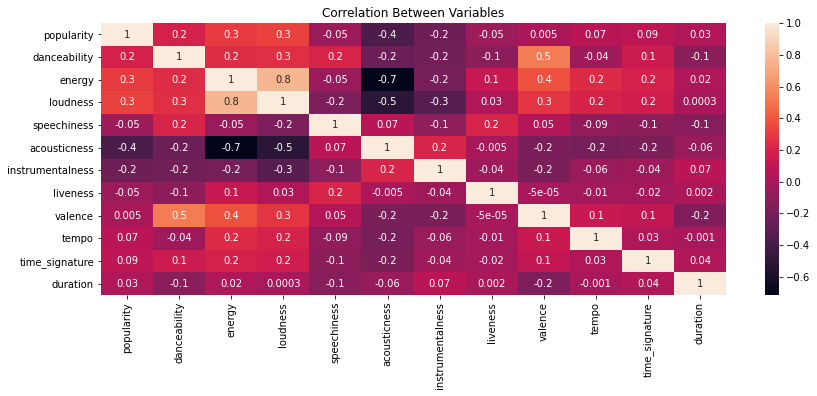

In [113]:
#pearson correlation
corr_songs = songs.drop(["key","mode","explicit"],axis=1).corr(method="pearson")

plt.figure(figsize=(14,5))
# format, 1 decimal place, annotation include the numbers
heatmap = sns.heatmap(corr_songs, annot=True,fmt=".1g")
heatmap.set_title("Correlation Between Variables")

In [115]:
# taking sample from a large dataset
# gives specific sample of larger dataset, 0.4% of whole dataset
sample_df = songs.sample(int(0.004*len(songs)))
len(sample_df)

2346

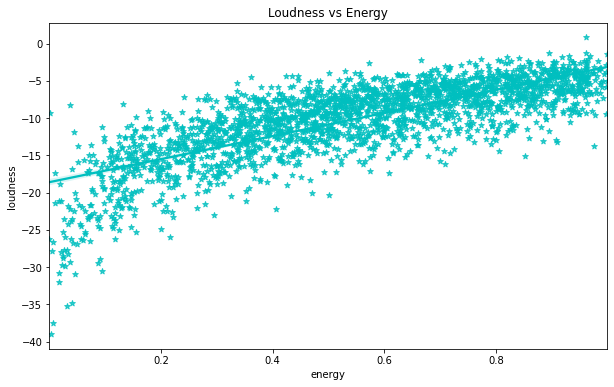

In [120]:
# relationship between energy and loudness
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c",marker="*").set(title="Loudness vs Energy")
plt.show()

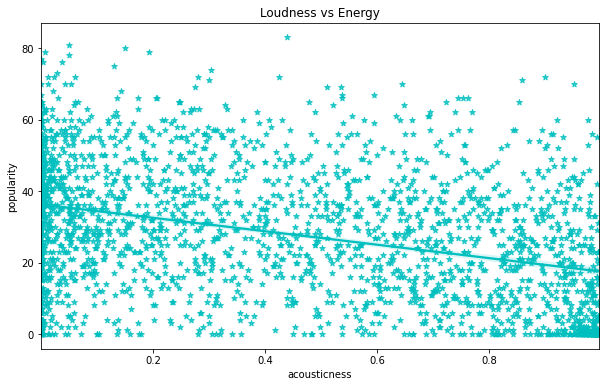

In [121]:
# relationship between popularity and acousticness
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness",color="c",marker="*").set(title="Loudness vs Energy")
plt.show()

In [123]:
# number of songs per YEAR

#getting the years
songs["dates"] = songs.index.get_level_values("release_date")
songs.dates = pd.to_datetime(songs.dates)
years = songs.dates.dt.year

years

release_date
1922-02-22    1922
1922-06-01    1922
1922-03-21    1922
1922-03-21    1922
1922-01-01    1922
              ... 
2020-09-26    2020
2020-10-21    2020
2020-09-02    2020
2021-03-05    2021
2015-07-01    2015
Name: dates, Length: 586601, dtype: int64

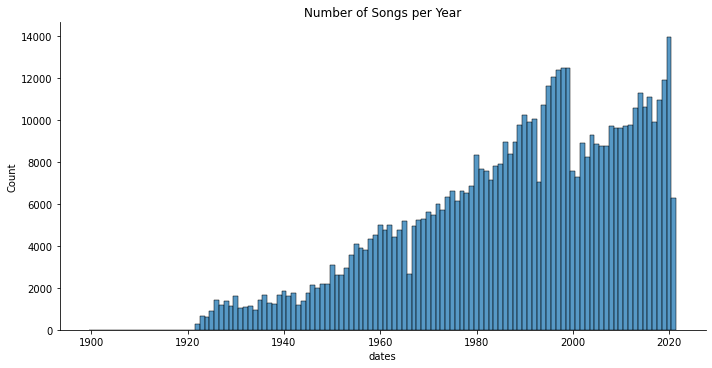

In [124]:
sns.displot(years,discrete=True,aspect=2, height=5,kind="hist").set(title="Number of Songs per Year")